In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Model to predict the sales given the spend on marketing
data = {'Marketing Spend( Million $)' : [23 , 26, 30 , 34 , 43 , 48], 
        'Sales (Million $)': [651 , 762 , 856 ,1063 , 1190 , 1298]}

In [4]:
data

{'Marketing Spend( Million $)': [23, 26, 30, 34, 43, 48],
 'Sales (Million $)': [651, 762, 856, 1063, 1190, 1298]}

In [5]:
data = pd.DataFrame(data)
data

,Marketing Spend( Million $),Sales (Million $)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


<AxesSubplot:xlabel='Marketing Spend( Million $)', ylabel='Sales (Million $)'>

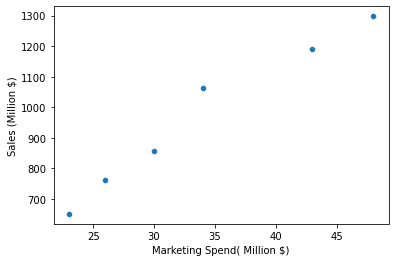

In [6]:
sns.scatterplot( data = data , x = 'Marketing Spend( Million $)' , y = 'Sales (Million $)')

In [7]:
# Scaling the data between 0 and 1
scaler = MinMaxScaler()
data[['Marketing Spend( Million $)', 'Sales (Million $)']] = \
scaler.fit_transform(data[['Marketing Spend( Million $)', 'Sales (Million $)']])

In [8]:
data

,Marketing Spend( Million $),Sales (Million $)
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


<AxesSubplot:xlabel='Marketing Spend( Million $)', ylabel='Sales (Million $)'>

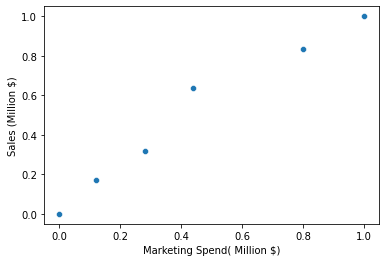

In [9]:
sns.scatterplot( data = data , x = 'Marketing Spend( Million $)' , y = 'Sales (Million $)')

Build the Linear Regression Model

In [10]:
# Read in the data
X = data['Marketing Spend( Million $)'].values.reshape(-1,1)
y = data['Sales (Million $)']

In [11]:
X

array([[0.  ],
       [0.12],
       [0.28],
       [0.44],
       [0.8 ],
       [1.  ]])

In [12]:
reg = LinearRegression() 
reg.fit(X,y)

LinearRegression()

In [13]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
y_pred

array([0.05907859, 0.17743302, 0.33523892, 0.49304482, 0.8481081 ,
       1.04536548])

In [14]:
r2_score(y, y_pred) # Marketing spends account for 96.5% of the variation present in the Sales

0.9652190930694494

In [15]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y - y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

0.02680830738175687
0.0044680512302928115
0.06684348308019872


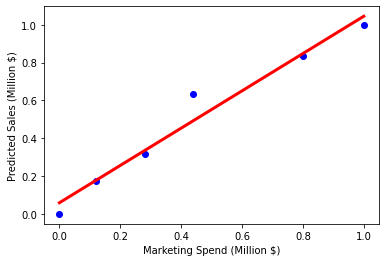

In [18]:
# Plot for Predicted sales vs Marketing Spend
plt.scatter( X , y , color = 'blue') # original data shown as blue points
plt.plot(X , y_pred , color = 'red' , linewidth = 3) # Fitted model in red

plt.xlabel("Marketing Spend (Million $)")
plt.ylabel("Predicted Sales (Million $)")
plt.show()

In [19]:
poly = PolynomialFeatures(3) # Want to generate features with degree less than or equal to
                             # the specified degree

In [20]:
poly

PolynomialFeatures(degree=3)

In [21]:
Y = poly.fit_transform(X) # Transform the variable X to 1, X, X^2, X^3
print(Y)

[[1.       0.       0.       0.      ]
 [1.       0.12     0.0144   0.001728]
 [1.       0.28     0.0784   0.021952]
 [1.       0.44     0.1936   0.085184]
 [1.       0.8      0.64     0.512   ]
 [1.       1.       1.       1.      ]]
